# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           1107 non-null   object
 1   Marca           1107 non-null   object
 2   Preco_Normal    1107 non-null   int64 
 3   Preco_Desconto  1107 non-null   int64 
 4   Preco_Anterior  1107 non-null   int64 
 5   Desconto        1107 non-null   int64 
 6   Categoria       1107 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.7+ KB


,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto
count,1107.000000,1107.000000,1107.000000,1107.000000
mean,2070.997290,522.269196,372.257453,68.109304
std,2961.257627,1339.559852,1239.475017,241.158310
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1269.000000,0.000000,0.000000,0.000000
75%,2849.000000,0.000000,0.000000,0.000000
max,19788.000000,14550.000000,18899.000000,4349.000000


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
display(df)
print(df.columns)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
...,...,...,...,...,...,...,...
1102,"Helado bresler pote cassata 2,4l",Bresler,0,4359,5449,1090,congelados
1103,"Helado Trisabor chocolate lúcuma y manjar 2,4 L",Bresler,0,4359,5449,1090,congelados
1104,Shampoo Reconstrucción Completa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal
1105,Acondicionador Hidratación Intensa 400 ml,Dove,0,2690,3849,1159,belleza-y-cuidado-personal


Index(['title', 'Marca', 'Preco_Normal', 'Preco_Desconto', 'Preco_Anterior',
       'Desconto', 'Categoria'],
      dtype='object')


In [4]:
#Juntando média e mediana na mesma tabela para facilitar a comparação. .agg(['coluna 1', 'coluna 2'])

df.groupby('Categoria')['Preco_Normal'].agg(['mean', 'median']).reset_index().reset_index().sort_values(by='Categoria', ascending=True)

,index,Categoria,mean,median
0,0,belleza-y-cuidado-personal,1783.556485,1569.0
1,1,comidas-preparadas,3095.043478,3290.0
2,2,congelados,2108.042553,1519.0
3,3,frutas,1724.473684,1195.0
4,4,instantaneos-y-sopas,765.491228,439.0
5,5,lacteos,2385.219239,989.0
6,6,verduras,1343.296875,1180.0


- Média abaixo da mediana: comidas-preparadas
    
- Média acima da mediana: belleza-y-cuidado-personal, congelados, frutas, instantaneos-y-sopas, verduras.

    - Todas categorias apresentam alguma diferença entre **média** e **mediana**, um achado completamente natural. Essa diferença alterna para um pouco mais ou um pouco menos distante da mediana.
    - na categoria **lacteos**, essa diferença é marcante, indicando a presença de valores muito discrepantes dentro da amostra. 

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [5]:

# Calcular desvio padrão do Preco_Normal por categoria
desvio_padrao = df.groupby('Categoria')['Preco_Normal'].std().reset_index(name='Desvio_Padrao')

print(desvio_padrao)


                    Categoria  Desvio_Padrao
0  belleza-y-cuidado-personal    2210.041719
1          comidas-preparadas    2019.911428
2                  congelados    2111.539896
3                      frutas    1639.151114
4        instantaneos-y-sopas    1170.232869
5                     lacteos    3925.816164
6                    verduras    1012.699625


 - A Categoria **lacteos** apresentou o maior **desvio padrão** enquanto a categoria **verduras** apresentou o menor.

  - Um desvio Padrão **maior** indica maior dispersão de valores, ou seja, há maior variação de preços dentro dessa categoria e, portanto, maior diferença entre média e mediana. 

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

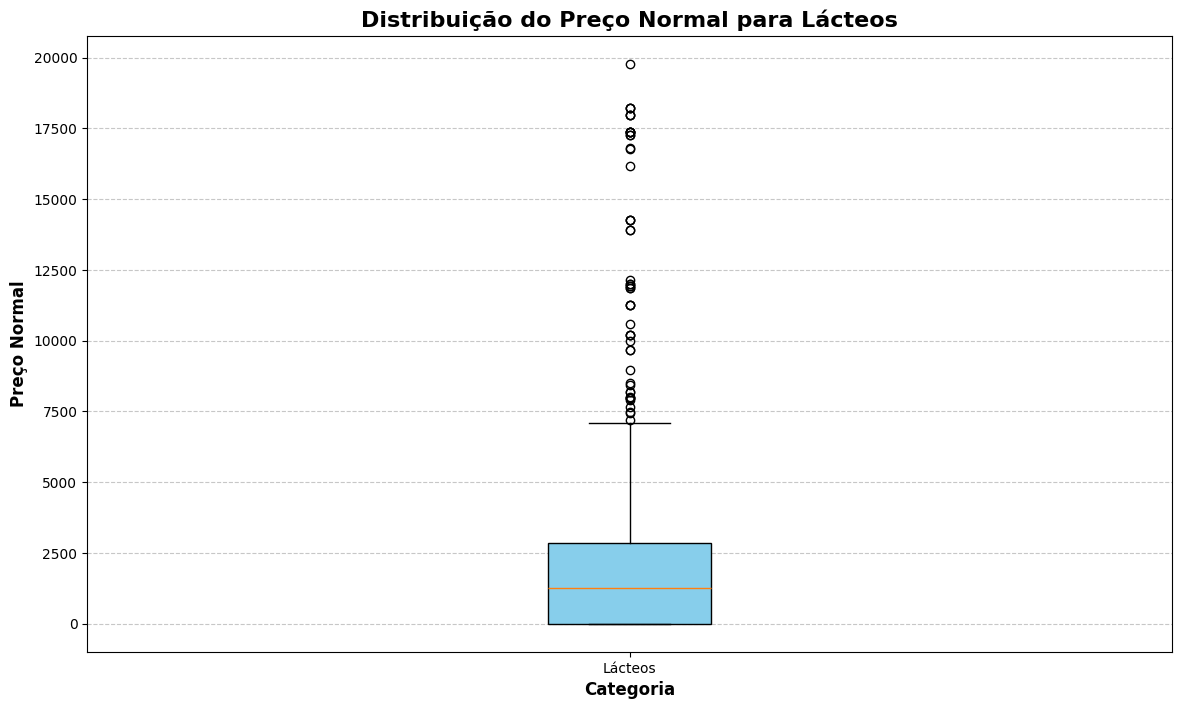

In [6]:
# Filtrar os dados para a categoria 'Lacteos'
df.loc[df['Categoria'] == 'Lacteos']

# boxplot
plt.figure(figsize=(14, 8))
plt.boxplot(df['Preco_Normal'], 
            vert=True, 
            patch_artist=True, 
            boxprops=dict(facecolor='skyblue'))

# Configurar o gráfico
plt.title('Distribuição do Preço Normal para Lácteos', fontweight='bold', fontsize=16)
plt.ylabel('Preço Normal', fontweight='bold', fontsize=12)
plt.xlabel('Categoria',fontweight='bold', fontsize=12)
plt.xticks([1], ['Lácteos'])  # Ajusta o rótulo para lacteos

plt.grid(axis='y',linestyle='--', alpha=0.7)
plt.show()

#### A variação dos preços dos Lacteos, com produtos com valores muito acima da faixa padrão, me faz sugerir duas possibilidades: 

#### 1. Há uma linha de produtos premium que possuem valor agregado muito superior e que aparecem fora do padrão.
#### 2. São outliers, são aparições atipicas dos valores ou foram erros de plotagem. 

### Há uma questão importante aqui: Preço Normal e Preço anterior são a mesma coisa. Mas do jeito que está na tabela, separados, gera-se um grande número de entradas = 0 em ambas colunas, puxando a média para baixo e afetando a qualidade da análise. Eu fiz essa análise (juntando as duas colunas para reduzir o número de entradas = 0) para verificar se afetava a análise referente aos outliers e não, os outliers permaneceram lá. Mas é importante que haja essa correção, pois se eu apresentar um box plot de preço para uma plateia que entende esse gráfico, vão perceber que a linha do limite inferior está encostada no zero e vão me questionar se há produtos sendo dados de graça.  

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

C:\Users\adria\AppData\Local\Temp\ipykernel_12584\333079952.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Desconto_Percentual', data=media_desconto_percentual, palette='Accent', edgecolor='black', linewidth=0.3, alpha=1.0) # palette é a paleta de cores das colunas.


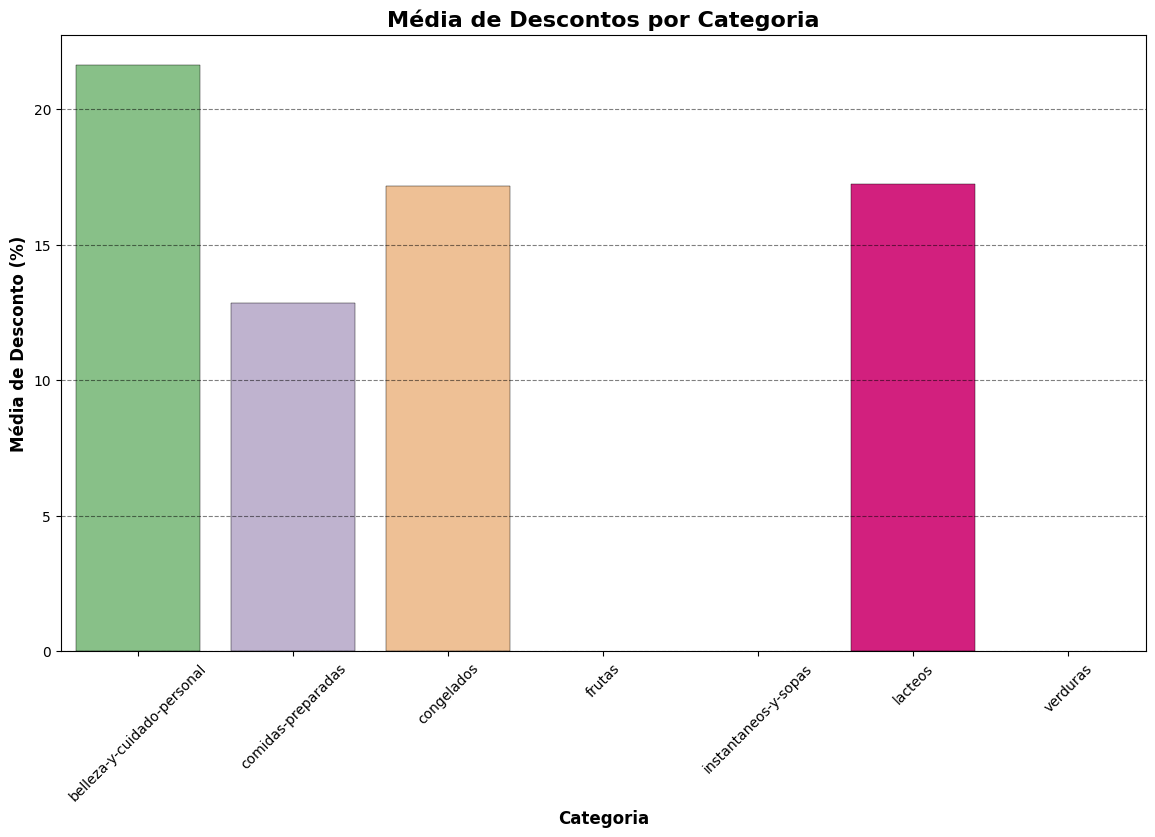

In [7]:
#vou transformar o desconto em %
df['Desconto_Percentual'] = (df['Desconto'] / df['Preco_Anterior']) * 100

# Média de descontos por categoria
media_desconto_percentual = df.groupby('Categoria')['Desconto_Percentual'].mean().reset_index()


# Plotar gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x='Categoria', y='Desconto_Percentual', data=media_desconto_percentual, palette='Accent', edgecolor='black', linewidth=0.3, alpha=1.0) # palette é a paleta de cores das colunas.

plt.title('Média de Descontos por Categoria', fontweight='bold', fontsize=16) 
plt.xticks(rotation=45)
plt.ylabel('Média de Desconto (%)', fontweight='bold', fontsize=12)
plt.xlabel('Categoria', fontweight='bold', fontsize=12)
plt.grid(axis='y',linestyle='--', alpha=0.5, color='black' )
plt.show()



#### O Gráfico revela quais categorias possuem mais descontos em %. Não é adequado apresentar esse gráfico em valores absolutos, pois são categorias de produtos muito distintos. As colunas ficariam muito diferentes. Uma opção é apresentar o gráfico e em separado, durante a apresentação, citar o quanto rrepresenta esse desconto do gráfico. 

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [8]:
# Criar a Treemap com categoria e marca balisados pela média de desconto. 

# Calcular o desconto em % (se usar o preço normal vai dar erro.)
df['Desconto_Percentual'] = (df['Desconto'] / df['Preco_Anterior']) * 100

# Calcular a média do desconto % por categoria e marca
media_desconto_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto_Percentual'].mean().reset_index()

# Criar o mapa interativo
fig = px.treemap(
    media_desconto_categoria_marca, 
    path=['Categoria', 'Marca'], 
    values='Desconto_Percentual',  
    color='Desconto_Percentual', 
    color_continuous_scale='Inferno',
    title='Média de Descontos Percentuais por Categoria e Marca'
)

fig.show()




#### Nesse mapa interativo conseguimos destrinchar, dentro de cada categoria, quais são as marcas com maior desconto. 
#### Novamente usei valores relativos, pois valores absolutos geraria um gráfico distorcido já que são catergorias de produtos diferentes. 